In [ ]:
import os
from collections import defaultdict

def count_classes_in_subdatasets(base_folder):
	"""
	Counts the number of files in each class folder within each sub-dataset of the base folder.

	Args:
		base_folder (str): Path to the main folder containing sub-datasets.

	Returns:
		dict: Nested dictionary with counts: {sub_dataset: {class_name: count}}
	"""

	class_counts = {}

	for sub_dataset in os.listdir(base_folder):
		sub_path = os.path.join(base_folder, sub_dataset)
		if os.path.isdir(sub_path):
			class_counts[sub_dataset] = defaultdict(int)
			for class_name in os.listdir(sub_path):
				class_path = os.path.join(sub_path, class_name)
				if os.path.isdir(class_path):
					num_files = len([f for f in os.listdir(class_path) if os.path.isfile(os.path.join(class_path, f))])
					class_counts[sub_dataset][class_name] = num_files
	return class_counts

def count_classes_in_file(file):
	"""
	Counts the number of files in each class folder listed in a file.

	Args:
		file (str): Path to the file containing class names and their counts.

	Returns:
		dict: Dictionary with counts: {class_name: count}
	"""

	class_counts = defaultdict(int)

	with open(file, 'r') as f:
		for line in f:
			class_name = line.strip().split('/')[1]  # Assuming format "split/class_name/filename"
			class_counts[class_name] += 1

	return class_counts

def print_count_summary(class_counts):
	"""
	Prints a summary of class counts for each sub-dataset.

	Args:
		class_counts (dict): Nested dictionary with counts: {sub_dataset: {class_name: count}}
	"""
	for sub_dataset, counts in class_counts.items():
		print(f"Sub-dataset: {sub_dataset}")
		for class_name, count in counts.items():
			print(f"  Class '{class_name}': {count}")
		total = sum(counts.values())
		print(f"  Total count: {total}")

def count_total_per_set(class_counts):
	"""
	Counts the total number of files across all classes in all sub-datasets.

	Args:
		class_counts (dict): Nested dictionary with counts: {sub_dataset: {class_name: count}}
	Returns:
		int: Total count of files across all sub-datasets. It shows also percentages.
	"""
	total_count = 0
	for sub_dataset, counts in class_counts.items():
		sub_total = sum(counts.values())
		total_count += sub_total
		print(f"Sub-dataset '{sub_dataset}' total: {sub_total}")

	print(f"Overall total count: {total_count}")
	return total_count

In [2]:
class_counts = count_classes_in_subdatasets('data/JacobMed_original')
print_count_summary(class_counts)

# plot the count per class, you can use matplotlib or seaborn. show percentages
total_count = count_total_per_set(class_counts)

Sub-dataset: train
  Class 'No_Cancer': 1081
  Class 'Gleason_3': 2275
  Class 'PIN_de_alto_grado': 2476
  Class 'Gleason_5_no_glandulas': 10908
  Class 'Carcinoma_intraductal': 1083
  Class 'Gleason_4_pobremente_formadas': 1136
  Class 'Gleason_5_comedonecrosis': 499
  Class 'Inflamatorio': 714
  Class 'Gleason_4_glomeruloide': 218
  Class 'Gleason_4_fusionadas': 6938
  Class 'Glandulas_no_neoplasicas': 32304
  Class 'Estroma': 22219
  Class 'Gleason_4_cribiformes': 12723
  Class 'Adenocarcinoma_ductal': 18917
  Total count: 113491
Sub-dataset: val
  Class 'No_Cancer': 121
  Class 'Gleason_3': 253
  Class 'PIN_de_alto_grado': 276
  Class 'Gleason_5_no_glandulas': 1213
  Class 'Carcinoma_intraductal': 121
  Class 'Gleason_5_comedonecrosis': 56
  Class 'Glandulas_no_neoplasicas': 3590
  Class 'Gleason_4_pobremente_formadas': 127
  Class 'Inflamatorio': 80
  Class 'Adenocarcinoma_ductal': 2102
  Class 'Gleason_4_glomeruloide': 25
  Class 'Gleason_4_fusionadas': 771
  Class 'Estroma': 246

In [3]:
class_counts

{'train': defaultdict(int,
             {'No_Cancer': 1081,
              'Gleason_3': 2275,
              'PIN_de_alto_grado': 2476,
              'Gleason_5_no_glandulas': 10908,
              'Carcinoma_intraductal': 1083,
              'Gleason_4_pobremente_formadas': 1136,
              'Gleason_5_comedonecrosis': 499,
              'Inflamatorio': 714,
              'Gleason_4_glomeruloide': 218,
              'Gleason_4_fusionadas': 6938,
              'Glandulas_no_neoplasicas': 32304,
              'Estroma': 22219,
              'Gleason_4_cribiformes': 12723,
              'Adenocarcinoma_ductal': 18917}),
 'val': defaultdict(int,
             {'No_Cancer': 121,
              'Gleason_3': 253,
              'PIN_de_alto_grado': 276,
              'Gleason_5_no_glandulas': 1213,
              'Carcinoma_intraductal': 121,
              'Gleason_5_comedonecrosis': 56,
              'Glandulas_no_neoplasicas': 3590,
              'Gleason_4_pobremente_formadas': 127,
          

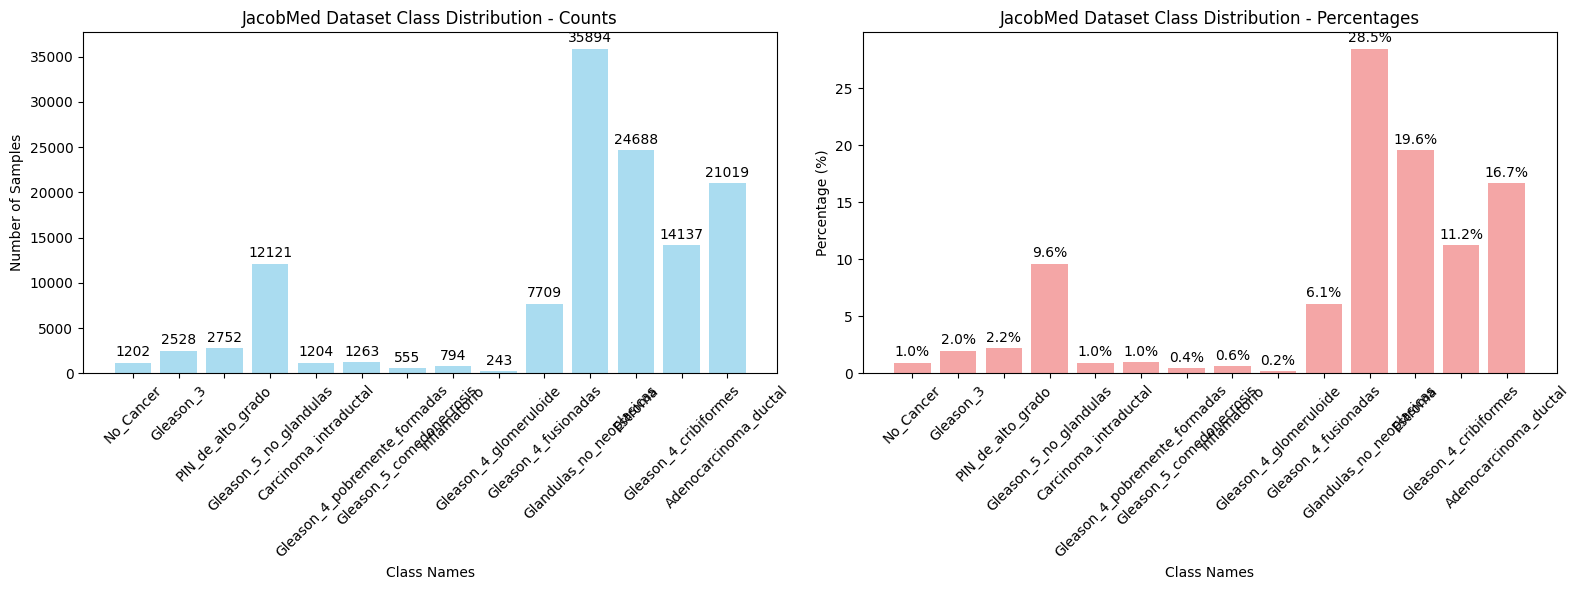


Class Distribution Summary:
Total samples: 126109
Number of classes: 14
Average samples per class: 9007.8
Min samples: 243 (Gleason_4_glomeruloide)
Max samples: 35894 (Glandulas_no_neoplasicas)


In [4]:
import matplotlib.pyplot as plt
import numpy as np

def plot_class_distribution(class_counts, title="Class Distribution"):
    """
    Plot class distribution with both counts and percentages.
    
    Args:
        class_counts (dict): Nested dictionary with counts: {sub_dataset: {class_name: count}}
        title (str): Title for the plot
    """
    # Aggregate counts across all sub-datasets
    total_counts = defaultdict(int)
    for sub_dataset, counts in class_counts.items():
        for class_name, count in counts.items():
            total_counts[class_name] += count
    
    # Convert to lists for plotting
    class_names = list(total_counts.keys())
    counts = list(total_counts.values())
    total_samples = sum(counts)
    percentages = [count / total_samples * 100 for count in counts]
    
    # Create subplots
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))
    
    # Plot 1: Counts
    bars1 = ax1.bar(class_names, counts, color='skyblue', alpha=0.7)
    ax1.set_xlabel('Class Names')
    ax1.set_ylabel('Number of Samples')
    ax1.set_title(f'{title} - Counts')
    ax1.tick_params(axis='x', rotation=45)
    
    # Add count labels on bars
    for bar, count in zip(bars1, counts):
        ax1.text(bar.get_x() + bar.get_width()/2, bar.get_height() + max(counts)*0.01,
                str(count), ha='center', va='bottom', fontsize=10)
    
    # Plot 2: Percentages
    bars2 = ax2.bar(class_names, percentages, color='lightcoral', alpha=0.7)
    ax2.set_xlabel('Class Names')
    ax2.set_ylabel('Percentage (%)')
    ax2.set_title(f'{title} - Percentages')
    ax2.tick_params(axis='x', rotation=45)
    
    # Add percentage labels on bars
    for bar, pct in zip(bars2, percentages):
        ax2.text(bar.get_x() + bar.get_width()/2, bar.get_height() + max(percentages)*0.01,
                f'{pct:.1f}%', ha='center', va='bottom', fontsize=10)
    
    plt.tight_layout()
    plt.show()
    
    # Print summary statistics
    print(f"\nClass Distribution Summary:")
    print(f"Total samples: {total_samples}")
    print(f"Number of classes: {len(class_names)}")
    print(f"Average samples per class: {total_samples / len(class_names):.1f}")
    print(f"Min samples: {min(counts)} ({class_names[counts.index(min(counts))]})")
    print(f"Max samples: {max(counts)} ({class_names[counts.index(max(counts))]})")
    
    return total_counts

# Plot the class distribution for the current class_counts
total_class_counts = plot_class_distribution(class_counts, "JacobMed Dataset Class Distribution")

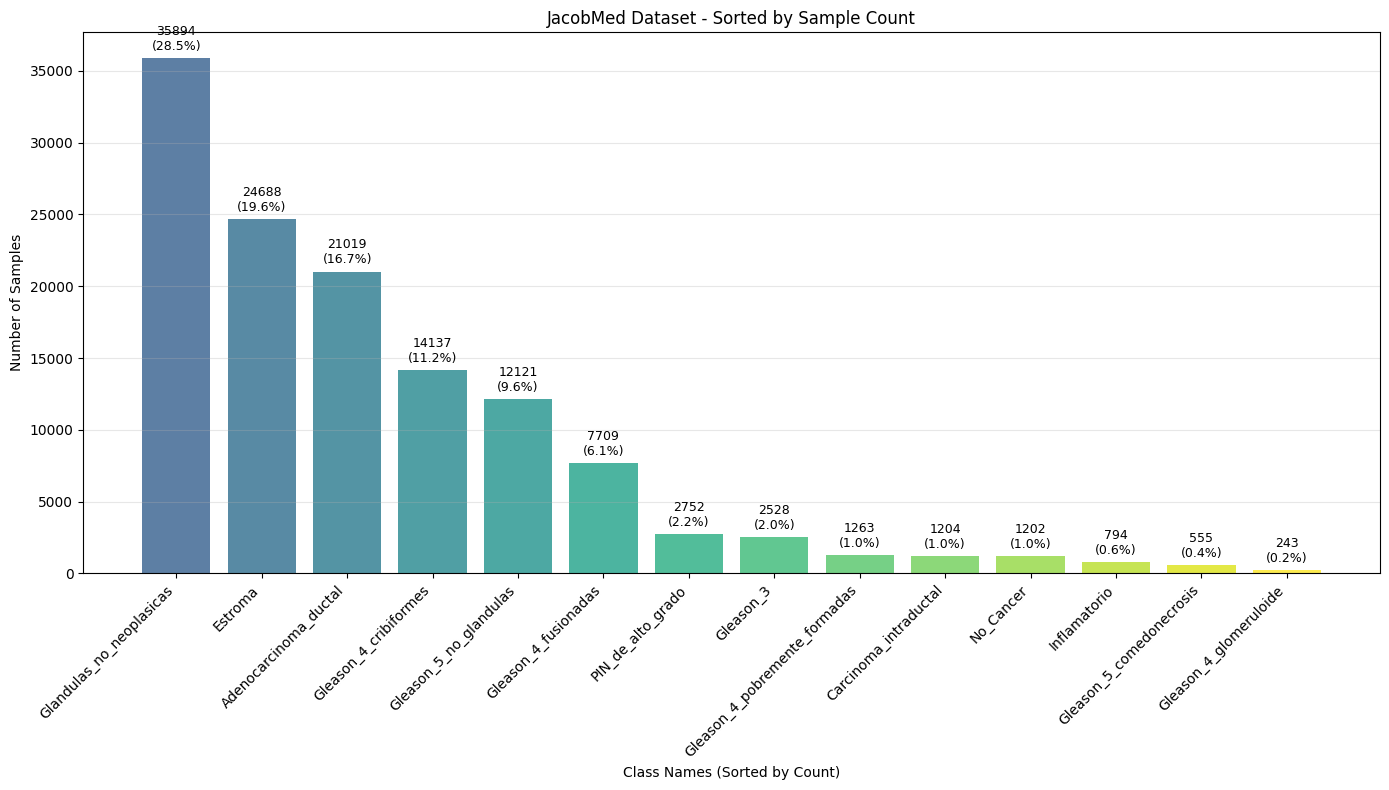


Class Imbalance Analysis:
Imbalance ratio (max/min): 147.7:1

Class tiers:
High (>20k samples): 3 classes - ['Glandulas_no_neoplasicas', 'Estroma', 'Adenocarcinoma_ductal']
Medium (5k-20k samples): 3 classes - ['Gleason_4_cribiformes', 'Gleason_5_no_glandulas', 'Gleason_4_fusionadas']
Low (<5k samples): 8 classes - ['PIN_de_alto_grado', 'Gleason_3', 'Gleason_4_pobremente_formadas', 'Carcinoma_intraductal', 'No_Cancer', 'Inflamatorio', 'Gleason_5_comedonecrosis', 'Gleason_4_glomeruloide']


In [5]:
def plot_sorted_class_distribution(total_counts, title="Sorted Class Distribution"):
    """
    Plot class distribution sorted by count to better visualize class imbalance.
    
    Args:
        total_counts (dict): Dictionary with class_name: count
        title (str): Title for the plot
    """
    # Sort classes by count (descending)
    sorted_items = sorted(total_counts.items(), key=lambda x: x[1], reverse=True)
    class_names = [item[0] for item in sorted_items]
    counts = [item[1] for item in sorted_items]
    
    # Calculate percentages
    total_samples = sum(counts)
    percentages = [count / total_samples * 100 for count in counts]
    
    # Create figure
    fig, ax = plt.subplots(1, 1, figsize=(14, 8))
    
    # Create color gradient (darker for higher counts)
    colors = plt.cm.viridis(np.linspace(0.3, 1, len(class_names)))
    
    # Plot bars
    bars = ax.bar(range(len(class_names)), counts, color=colors, alpha=0.8)
    
    # Customize plot
    ax.set_xlabel('Class Names (Sorted by Count)')
    ax.set_ylabel('Number of Samples')
    ax.set_title(title)
    ax.set_xticks(range(len(class_names)))
    ax.set_xticklabels(class_names, rotation=45, ha='right')
    
    # Add value labels on bars
    for i, (bar, count, pct) in enumerate(zip(bars, counts, percentages)):
        ax.text(bar.get_x() + bar.get_width()/2, bar.get_height() + max(counts)*0.01,
                f'{count}\n({pct:.1f}%)', ha='center', va='bottom', fontsize=9)
    
    # Add grid for better readability
    ax.grid(axis='y', alpha=0.3)
    
    plt.tight_layout()
    plt.show()
    
    # Print detailed statistics
    print(f"\nClass Imbalance Analysis:")
    print(f"Imbalance ratio (max/min): {max(counts)/min(counts):.1f}:1")
    
    # Calculate class distribution tiers
    high_count = [name for name, count in sorted_items if count > 20000]
    medium_count = [name for name, count in sorted_items if 5000 <= count <= 20000]
    low_count = [name for name, count in sorted_items if count < 5000]
    
    print(f"\nClass tiers:")
    print(f"High (>20k samples): {len(high_count)} classes - {high_count}")
    print(f"Medium (5k-20k samples): {len(medium_count)} classes - {medium_count}")
    print(f"Low (<5k samples): {len(low_count)} classes - {low_count}")

# Plot the sorted distribution
plot_sorted_class_distribution(total_class_counts, "JacobMed Dataset - Sorted by Sample Count")

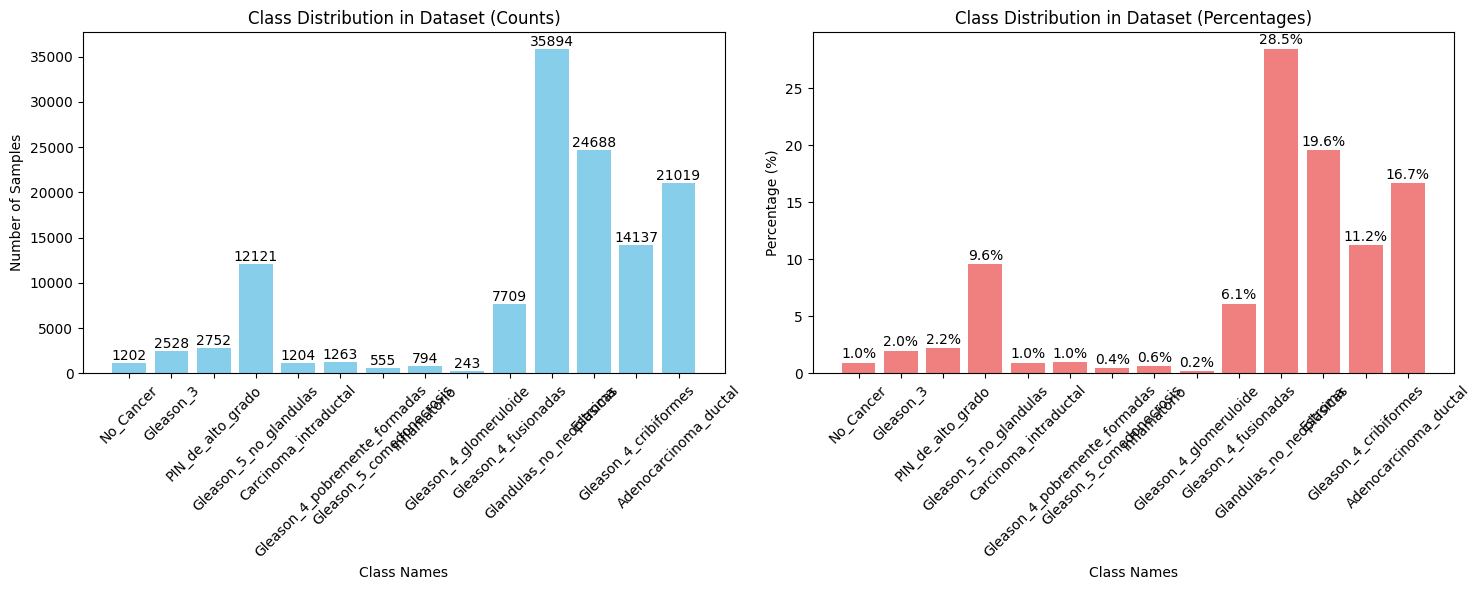


Total samples: 126109

Class distribution:
  No_Cancer: 1202 samples (1.0%)
  Gleason_3: 2528 samples (2.0%)
  PIN_de_alto_grado: 2752 samples (2.2%)
  Gleason_5_no_glandulas: 12121 samples (9.6%)
  Carcinoma_intraductal: 1204 samples (1.0%)
  Gleason_4_pobremente_formadas: 1263 samples (1.0%)
  Gleason_5_comedonecrosis: 555 samples (0.4%)
  Inflamatorio: 794 samples (0.6%)
  Gleason_4_glomeruloide: 243 samples (0.2%)
  Gleason_4_fusionadas: 7709 samples (6.1%)
  Glandulas_no_neoplasicas: 35894 samples (28.5%)
  Estroma: 24688 samples (19.6%)
  Gleason_4_cribiformes: 14137 samples (11.2%)
  Adenocarcinoma_ductal: 21019 samples (16.7%)


In [6]:
import matplotlib.pyplot as plt
import numpy as np

# Aggregate class counts across all sub-datasets
aggregated_counts = defaultdict(int)
for sub_dataset, counts in class_counts.items():
    for class_name, count in counts.items():
        aggregated_counts[class_name] += count

# Prepare data for plotting
class_names = list(aggregated_counts.keys())
class_sample_counts = list(aggregated_counts.values())
total_samples = sum(class_sample_counts)

# Calculate percentages
percentages = [count/total_samples * 100 for count in class_sample_counts]

# Create subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

# Bar plot with counts
bars1 = ax1.bar(class_names, class_sample_counts, color='skyblue')
ax1.set_xlabel('Class Names')
ax1.set_ylabel('Number of Samples')
ax1.set_title('Class Distribution in Dataset (Counts)')
ax1.tick_params(axis='x', rotation=45)

# Add count labels on bars
for bar, count in zip(bars1, class_sample_counts):
    ax1.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.5,
             str(count), ha='center', va='bottom')

# Bar plot with percentages
bars2 = ax2.bar(class_names, percentages, color='lightcoral')
ax2.set_xlabel('Class Names')
ax2.set_ylabel('Percentage (%)')
ax2.set_title('Class Distribution in Dataset (Percentages)')
ax2.tick_params(axis='x', rotation=45)

# Add percentage labels on bars
for bar, pct in zip(bars2, percentages):
    ax2.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.1,
             f'{pct:.1f}%', ha='center', va='bottom')

plt.tight_layout()
plt.show()

# Print summary
print(f"\nTotal samples: {total_samples}")
print("\nClass distribution:")
for class_name, count in aggregated_counts.items():
    percentage = count/total_samples * 100
    print(f"  {class_name}: {count} samples ({percentage:.1f}%)")

In [7]:
class_counts = count_classes_in_subdatasets('data/JacobMed')
print_count_summary(class_counts)

Sub-dataset: train
  Class 'Adenocarcinoma_ductal': 17026
  Class 'Carcinoma_intraductal': 975
  Class 'Estroma': 19998
  Class 'Glandulas_no_neoplasicas': 29074
  Class 'Gleason_3': 2048
  Class 'Gleason_4_cribiformes': 11451
  Class 'Gleason_4_fusionadas': 6245
  Class 'Gleason_4_glomeruloide': 197
  Class 'Gleason_4_pobremente_formadas': 1023
  Class 'Gleason_5_comedonecrosis': 450
  Class 'Gleason_5_no_glandulas': 9818
  Class 'Inflamatorio': 643
  Class 'No_Cancer': 973
  Class 'PIN_de_alto_grado': 2229
  Total count: 102150
Sub-dataset: val
  Class 'Adenocarcinoma_ductal': 1891
  Class 'Carcinoma_intraductal': 108
  Class 'Estroma': 2221
  Class 'Glandulas_no_neoplasicas': 3230
  Class 'Gleason_3': 227
  Class 'Gleason_4_cribiformes': 1272
  Class 'Gleason_4_fusionadas': 693
  Class 'Gleason_4_glomeruloide': 21
  Class 'Gleason_4_pobremente_formadas': 113
  Class 'Gleason_5_comedonecrosis': 49
  Class 'Gleason_5_no_glandulas': 1090
  Class 'Inflamatorio': 71
  Class 'No_Cancer': 

In [8]:
class_counts_train = count_classes_in_file('data/JacobMed_original/train.txt')
print("Class counts in train.txt:")
print_count_summary({'train': class_counts_train})

class_counts_val = count_classes_in_file('data/JacobMed_original/val.txt')
print("Class counts in val.txt:")
print_count_summary({'val': class_counts_val})

class_counts_test = count_classes_in_file('data/JacobMed_original/test.txt')
print("Class counts in test.txt:")
print_count_summary({'test': class_counts_test})

Class counts in train.txt:
Sub-dataset: train
  Class 'Adenocarcinoma_ductal': 17026
  Class 'Carcinoma_intraductal': 975
  Class 'Estroma': 19998
  Class 'Glandulas_no_neoplasicas': 29074
  Class 'Gleason_3': 2048
  Class 'Gleason_4_cribiformes': 11451
  Class 'Gleason_4_fusionadas': 6245
  Class 'Gleason_4_glomeruloide': 197
  Class 'Gleason_4_pobremente_formadas': 1023
  Class 'Gleason_5_comedonecrosis': 450
  Class 'Gleason_5_no_glandulas': 9818
  Class 'Inflamatorio': 643
  Class 'No_Cancer': 973
  Class 'PIN_de_alto_grado': 2229
  Total count: 102150
Class counts in val.txt:
Sub-dataset: val
  Class 'Adenocarcinoma_ductal': 1891
  Class 'Carcinoma_intraductal': 108
  Class 'Estroma': 2221
  Class 'Glandulas_no_neoplasicas': 3230
  Class 'Gleason_3': 227
  Class 'Gleason_4_cribiformes': 1272
  Class 'Gleason_4_fusionadas': 693
  Class 'Gleason_4_glomeruloide': 21
  Class 'Gleason_4_pobremente_formadas': 113
  Class 'Gleason_5_comedonecrosis': 49
  Class 'Gleason_5_no_glandulas': 1

In [9]:
# see if there is any element repeated in the train.txt, val.txt, and test.txt files
def find_repeated_elements(train_file, val_file, test_file):
	"""
	Finds elements that are repeated across any two of train, val, and test files.

	Args:
		train_file (str): Path to the train file.
		val_file (str): Path to the validation file.
		test_file (str): Path to the test file.

	Returns:
		set: Set of repeated elements.
	"""
	with open(train_file, 'r') as f:
		train_set = set(f.read().splitlines())
	with open(val_file, 'r') as f:
		val_set = set(f.read().splitlines())
	with open(test_file, 'r') as f:
		test_set = set(f.read().splitlines())

	repeated_elements = (train_set & val_set) | (train_set & test_set) | (val_set & test_set)
	return repeated_elements

In [10]:
find_repeated_elements(
	"data/JacobMed_original/train.txt",
	"data/JacobMed_original/val.txt",
	"data/JacobMed_original/test.txt"
)

set()

In [11]:
find_repeated_elements('tmp/train.txt',
					   'tmp/val.txt',
					   'tmp/test.txt')

{'train/Adenocarcinoma_ductal/1570133_013665_024641_000224.png',
 'train/Adenocarcinoma_ductal/1571051_030465_002689_000224.png',
 'val/Adenocarcinoma_ductal/1570391_012769_032705_000224.png'}

Datos no balanceados. Además, no se corresponde con la realidad (en la práctica, la mayoría de las histologías deberían ser de tipo "No_Cancer"). 